In [2]:
using Pkg
Pkg.activate("..")
using Revise
using PythonPlot
PythonPlot.svg(true)
using SizeStructuredPopulations
using SpecialFunctions

methods(generate_cell)

  Activating project at `~/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/SizeStructuredPopulations`


# 1 method for generic function "generate_cell" from SizeStructuredPopulations:
 [1] generate_cell(model::GrowthModel, init::Vector{Float64}, Tmax::Float64; dt)
     @ ~/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/SizeStructuredPopulations/src/model.jl:26

In [9]:
λ(x) = 1.0 + 0.1*sum(x)
α = 0.5
σY = 0.05
function β(x, z, t)
    y0 = z[1]- z[2]
    μ = log(2) - α * y0
    A = exp(-((z[1] - μ)^2) / (2 * σY^2))/(2 * π * σY^2)^(1/2)
    B = (1 - erf((z[1] - μ) / (sqrt(2) * σY)))
    return  λ(x)*A / B
end

h(z, x) = ([z[1] - log(2),0],x)
L(x, t, dt) = -0.5 .*x*dt .+ sqrt(dt) .*randn(3)

model = GrowthModel(λ, β, h, L)
init = vcat([0.0], [0.0, 0.0], zeros(3))




cell = generate_cell(model, init,10.0,dt = 0.01);
root = simulate_lineage(model, 20., init, dt = 0.01);
df = lineage_to_dataframe(root);

cell

Cell([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09  …  0.8000000000000005, 0.8100000000000005, 0.8200000000000005, 0.8300000000000005, 0.8400000000000005, 0.8500000000000005, 0.8600000000000005, 0.8700000000000006, 0.8800000000000006, 0.8900000000000006], [[0.0, 0.0], [0.01, 0.01], [0.01999266040328574, 0.01999266040328574], [0.030038675825861436, 0.030038675825861436], [0.040059930294419795, 0.040059930294419795], [0.04994570410077556, 0.04994570410077556], [0.059869350505832974, 0.059869350505832974], [0.06996976865352539, 0.06996976865352539], [0.08001877982556206, 0.08001877982556206], [0.09006418124931145, 0.09006418124931145]  …  [0.723261512963648, 0.723261512963648], [0.7301920422825453, 0.7301920422825453], [0.7372395416973941, 0.7372395416973941], [0.7446385044430422, 0.7446385044430422], [0.7520657983440204, 0.7520657983440204], [0.7594979868206937, 0.7594979868206937], [0.7671568028055429, 0.7671568028055429], [0.7751687225843062, 0.775168722584

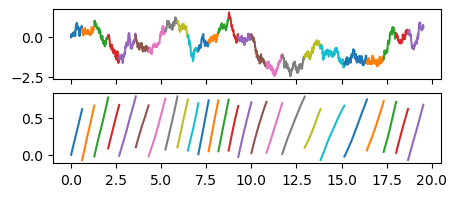

In [4]:
fig, axs = subplots(figsize=(5,2),nrows=2,sharex=true)


ax = axs[0]

data = root
while data.daughterL !== nothing
    ax.plot(data.time,[x[1] for x in data.x])
    data = data.daughterL
end

ax = axs[1]

data = root
while data.daughterL !== nothing
    ax.plot(data.time,[z[1] for z in data.z])
    data = data.daughterL
end
fig  

In [5]:
λ(x) = 1.0
β(x, z, t) = 0.5
h(z, x) = (x,z[1] - log(2),0)
L(x, t, dt) = -0.5*x + sqrt(dt)*randn(3)

model = GrowthModel(λ, β, h, L)

GrowthModel(Main.λ, Main.β, Main.h, Main.L)

In [6]:
methods(generate_cell)

# 1 method for generic function "generate_cell" from SizeStructuredPopulations:
 [1] generate_cell(model::GrowthModel, init::Vector{Float64}, Tmax::Float64; dt)
     @ ~/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/SizeStructuredPopulations/src/model.jl:26